Azure Notebook Climate Change Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()

Import data

In [10]:
import zipfile
with zipfile.ZipFile('notebook-resources.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [11]:
yearsBase, meanBase = np.loadtxt('5-year-mean-1951-1980.csv', delimiter=',', usecols=(0, 1), unpack=True)
years, mean = np.loadtxt('5-year-mean-1882-2014.csv', delimiter=',', usecols=(0, 1), unpack=True)

In [14]:
import pandas as pd
df = pd.read_csv('5-year-mean-1951-1980.csv')
df.head()

,1951,-0.08
0,1952,-0.08
1,1953,-0.06
2,1954,-0.10
3,1955,-0.09
4,1956,-0.08


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
1951     29 non-null int64
-0.08    29 non-null float64
dtypes: float64(1), int64(1)
memory usage: 544.0 bytes


Create a scatter plot

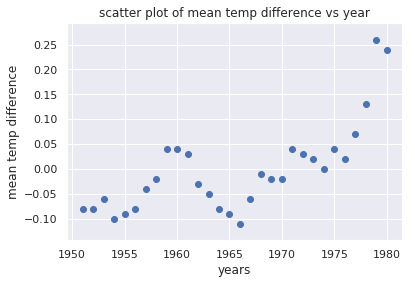

In [16]:
plt.scatter(yearsBase, meanBase)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

Perform Linear Regression

In [17]:
# This is a simple y = mx + b line function
def f(x):
    return m*x + b

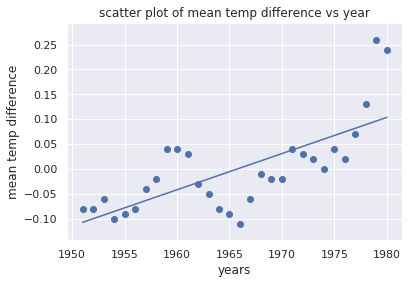

In [18]:
# Creates a linear regression from the data points
m,b = np.polyfit(yearsBase, meanBase, 1)

# This generates the same scatter plot as before, but adds a line plot using the function above
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, f(yearsBase))
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

In [19]:
# Prints text to the screen showing the computed values of m and b
print(' y = {0} * x + {1}'.format(m, b))
plt.show()

 y = 0.007279199110122221 * x + -14.309265850945222


Perform linear regression with scikit-learn

In [20]:
# Pick the Linear Regression model and instantiate it
model = LinearRegression(fit_intercept=True)

# Fit/build the model
model.fit(yearsBase[:, np.newaxis], meanBase)
mean_predicted = model.predict(yearsBase[:, np.newaxis])

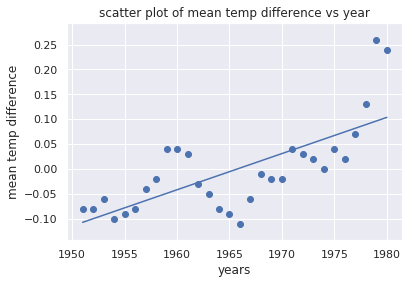

 y = 0.007279199110122357 * x + -14.309265850945492


In [22]:
#Generate a plot like the one in the previous exercise
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, mean_predicted)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

print(' y = {0} * x + {1}'.format(model.coef_[0], model.intercept_))

Perform linear regression with Seaborn

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


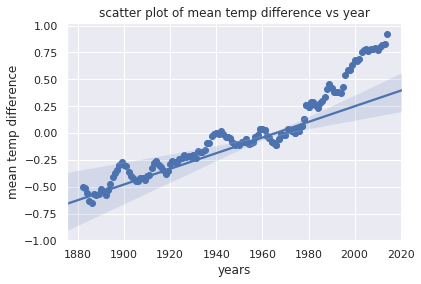

In [23]:
plt.scatter(years, mean)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
sns.regplot(yearsBase, meanBase)
plt.show()